In [1]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

- 한글로 되어있는 컬럼들의 차트를 그리면 글이 깨짐
- 차트에 한글쓰고 싶을 때, 아래코드 동작시키면 됨(잘안되면 runtime 다시 실행하는 방법도o)

In [3]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


AttributeError: ignored

In [4]:
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [5]:
uselog["usedate"].min(), uselog["usedate"].max()

('2018-04-01', '2019-03-31')

In [6]:
customer = pd.read_csv("/content/customer_master.csv") # customer_id 가 공통 id(그래야 나중에 데이터 다 묶을 수 있다!)-꼭이게 아니더라도 연결되는 데이터가 있음 / end_date에 NaN이 이렇게 많은 이유는? 아직 탈퇴 안했으니까!
print(len(customer))
customer.head()

# target변수는? is_deleted(0,1로 되어있음) - 1번을 찾아내야됨 (end_Date나 is_deleted 여야하는데 enddate는 따로 라벨링..?뭐 이런거 더 해줘야 함..?) 

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [7]:
class_master = pd.read_csv('class_master.csv') # 어떤 의미인지 보자.
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [8]:
campaign_master = pd.read_csv('campaign_master.csv') # campaign_id랑 campaign_name에 숫자가 다름 >> 맘에 안듦. 잘 맞춰줘야 함!(중간에 바꾸기 힘듦)(신규시스템 구축할때 요청하든 해야됨) - 통일해줘!!
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [9]:
uselog.info() # usedate > 타입이 object임.. >> date type으로 바꿔야 쓰기 편함! 바꾸기.@@!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [12]:
customer.info() # 문제가 있는 데이터 하나 있음.. >> end_date >> 얘만 1350개만 있음(근데 현재 유지하고 있는 고객이니까 없는거임!!)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  4192 non-null   object
 1   name         4192 non-null   object
 2   class        4192 non-null   object
 3   gender       4192 non-null   object
 4   start_date   4192 non-null   object
 5   end_date     1350 non-null   object
 6   campaign_id  4192 non-null   object
 7   is_deleted   4192 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 262.1+ KB


In [11]:
customer["is_deleted"].value_counts() # enddate 1350 수 같음.일치할듯

0    2842
1    1350
Name: is_deleted, dtype: int64

In [13]:
customer_join = pd.merge(customer, class_master, on = "class", how = "left") # 여러 데이터 한번에 볼 수 있게끔!! join시키자! / 오른쪽에 customer, 왼쪽에 class_mater / on은 어떤 컬럼을 중심으로 두 데이블 통합
customer_join

# 대부분 left, inner join사용함 (outer join은 NaN값이 많이 생겨서 문제)
# join 2번 하면 2번 생기니까 join할때 조심해서 하기!

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000
...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500


In [14]:
customer_join = pd.merge(customer_join, campaign_master, on = "campaign_id", how = "left")
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [15]:
customer_join.shape

(4192, 11)

In [16]:
print(len(customer))
print(len(customer_join))

4192
4192


In [17]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [18]:
customer_join.groupby("class_name")["customer_id"].count() # class_name으로 groupby하기 customer_id로 count해보자! >> 2:1:1비율!

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [19]:
customer_join["class_name"].value_counts() # 이렇게도 할 수 있다

0_종일    2045
2_야간    1128
1_주간    1019
Name: class_name, dtype: int64

<AxesSubplot:xlabel='class_name', ylabel='count'>

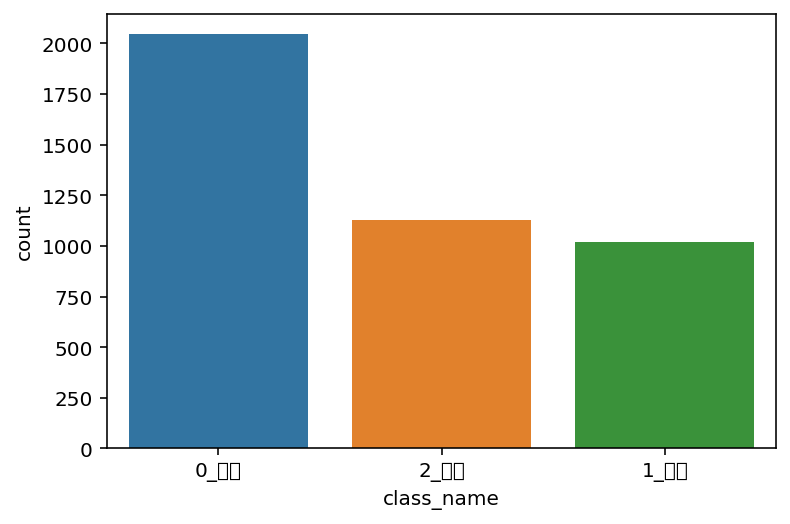

In [20]:
sns.countplot(customer_join["class_name"])

In [21]:
customer_join.groupby("campaign_name")["customer_id"].count()

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='campaign_name', ylabel='count'>

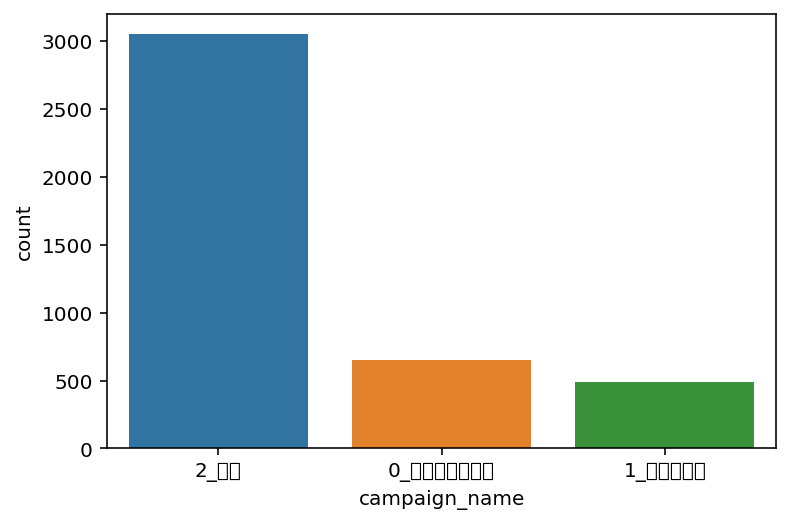

In [22]:
sns.countplot(customer_join["campaign_name"])

In [23]:
customer_join.groupby("gender")["customer_id"].count()

gender
F    1983
M    2209
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

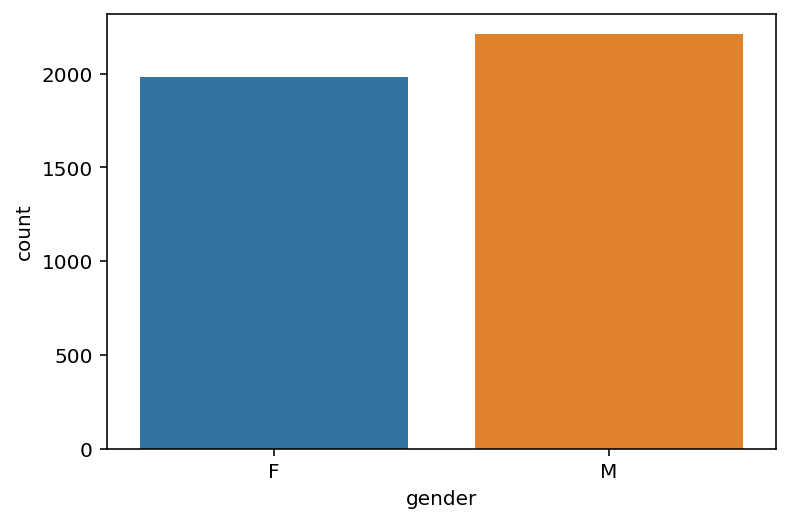

In [24]:
sns.countplot(customer_join["gender"])

In [27]:
customer_join.groupby("is_deleted")["customer_id"].count()

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='is_deleted', ylabel='count'>

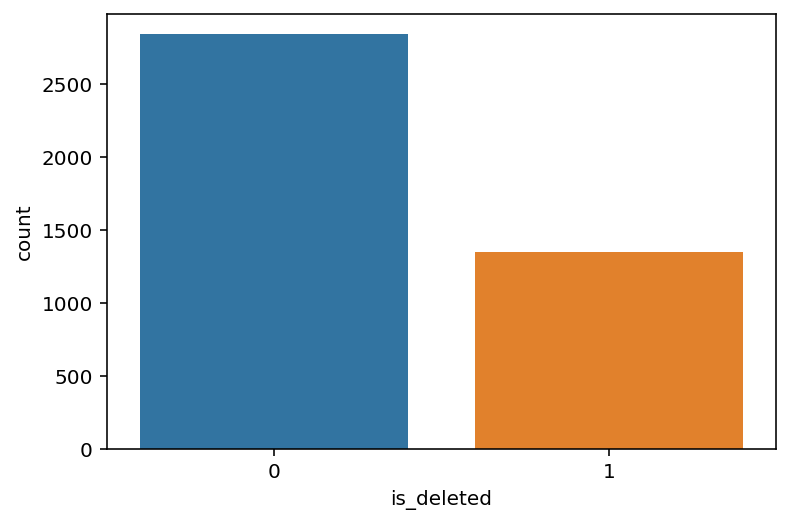

In [28]:
sns.countplot(customer_join["is_deleted"])

In [29]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"]) # type바꾸기!

In [30]:
customer_join.dtypes

customer_id              object
name                     object
class                    object
gender                   object
start_date       datetime64[ns]
end_date                 object
campaign_id              object
is_deleted                int64
class_name               object
price                     int64
campaign_name            object
dtype: object

In [31]:
customer_join['start_date'].min(), customer_join['start_date'].max()

(Timestamp('2015-05-01 00:00:00'), Timestamp('2019-03-15 00:00:00'))

In [32]:
start_new = customer_join.loc[customer_join["start_date"]>=pd.to_datetime("20180401")]
len(start_new)

1376

In [33]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])

In [34]:
customer_now = customer_join.loc[customer_join["is_deleted"]== 0] # 현재 유지하고 있는 고객들
len(customer_now)

2842

In [35]:
customer_now.groupby("class_name").count()["customer_id"]

class_name
0_종일    1381
1_주간     675
2_야간     786
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='class_name', ylabel='count'>

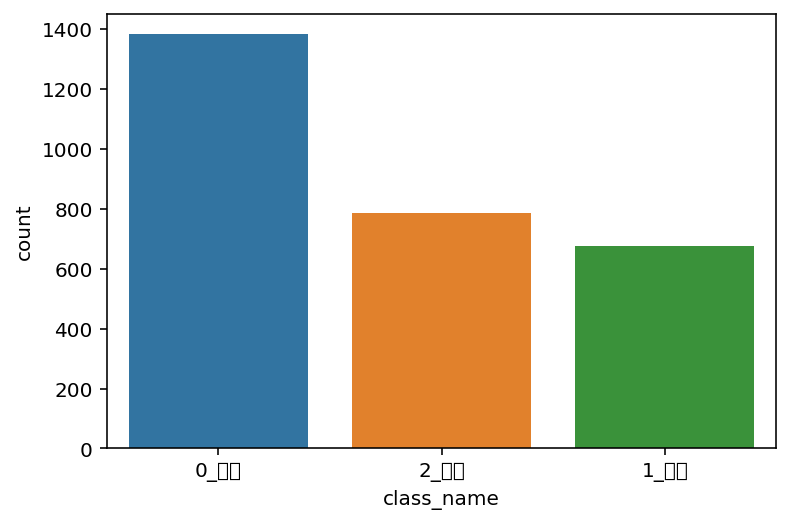

In [36]:
sns.countplot(customer_now["class_name"])

In [37]:
customer_now.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     282
1_입회비무료       219
2_일반         2341
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='campaign_name', ylabel='count'>

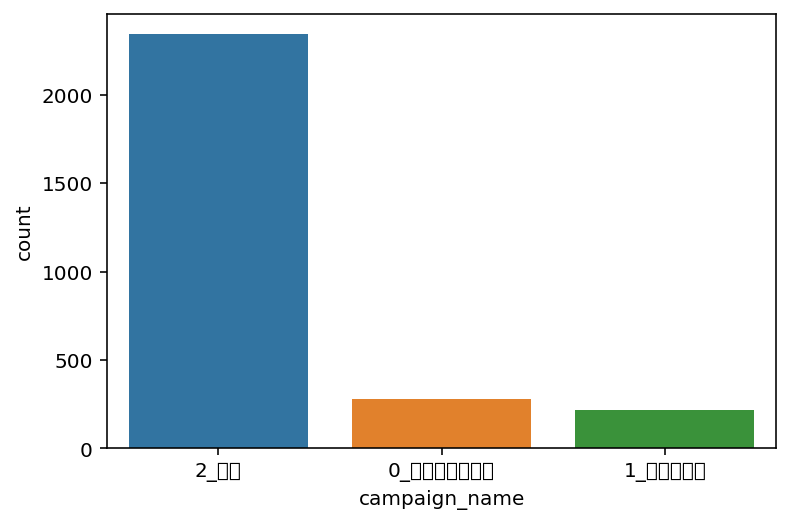

In [38]:
sns.countplot(customer_now["campaign_name"]) # 위랑 많이 다름 >> 비율이 현저하게 감소 >> 즉, 전체 고객을 봤을때 캠페인 통해서 들어온 숫자가 15%.. 현재 남아있는 고객들.. 별도의 캠페인 없이 들어온 고객들이 현저히 많다.

In [39]:
customer_now.groupby("gender").count()["customer_id"]

gender
F    1352
M    1490
Name: customer_id, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

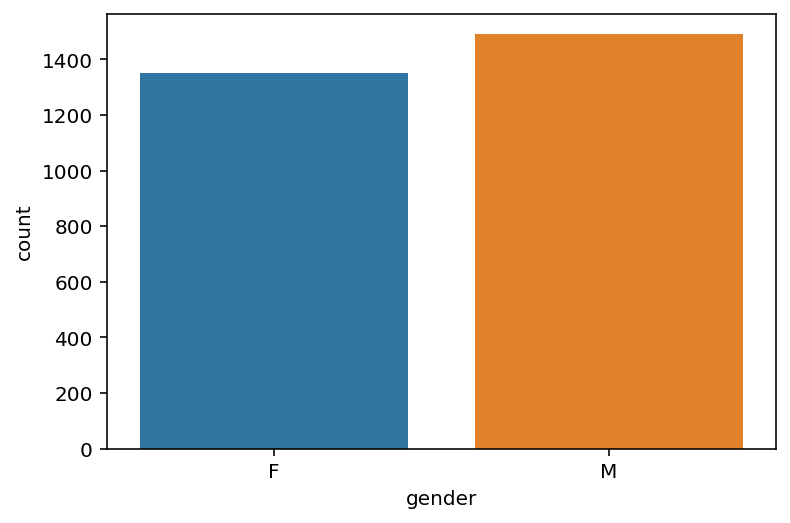

In [40]:
sns.countplot(customer_now["gender"])

In [41]:
df=customer_join.groupby(['campaign_name','is_deleted'])['customer_id'].count().to_frame().rename(columns={'customer_id':'count'}).reset_index()

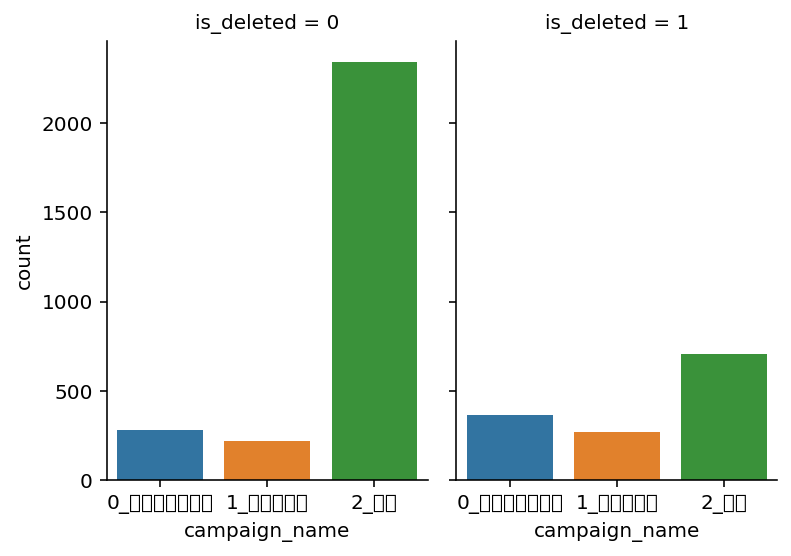

In [42]:
g = sns.catplot(x="campaign_name", y="count",col="is_deleted", # 정상고객들은 탈퇴 많이 안함 / 캠페인으로 들어온 고객들은 탈퇴 많이 함
                data=df, kind="bar",
                height=4, aspect=.7);

In [43]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["use_month"] = uselog["usedate"].dt.strftime("%Y%m") # # 새로운 변수 만들기! / 년도/월만 뽑아와! / dt라는 함수 그룹명을 꼭 붙여줘야 함!
uselog.head()

,log_id,customer_id,usedate,use_month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [45]:
uselog.shape

(197428, 4)

In [48]:
uselog.loc[uselog['customer_id']=="AS009373"].shape

(61, 4)

In [51]:
uselog.loc[uselog['customer_id']=="AS009373"]

,log_id,customer_id,usedate,use_month
0,L00000049012330,AS009373,2018-04-01,201804
7353,L00000049019683,AS009373,2018-04-15,201804
11304,L00000049023634,AS009373,2018-04-22,201804
18944,L00000049031274,AS009373,2018-05-06,201805
22671,L00000049035001,AS009373,2018-05-13,201805
...,...,...,...,...
182261,L00000049194591,AS009373,2019-03-03,201903
185793,L00000049198123,AS009373,2019-03-10,201903
189530,L00000049201860,AS009373,2019-03-17,201903
193184,L00000049205514,AS009373,2019-03-24,201903


In [44]:
uselog_month = uselog.groupby(["use_month", "customer_id"], as_index = False).count()  # 새로운 데이터프레임 만들자! / groupby하면 use_month, customer_id가 인덱스로 됨(그래서 인덱스 false해줌)
uselog_month # 한 고객이 특정월에 몇번 이용했나

,use_month,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [54]:
uselog_month.loc[uselog_month['customer_id']=="AS009373"].shape

(12, 4)

In [ ]:
uselog_month.loc[uselog_month['customer_id']=="AS009373"]

In [57]:
uselog_month.loc[uselog_month['customer_id']=="TS995853"].shape

(2, 4)

In [58]:
uselog_month.loc[uselog_month['customer_id']=="TS995853"] # 몇달안했지만 굉장히 heavy했던 고객(11번왔으니까..스포츠센트)

,use_month,customer_id,log_id,usedate
33884,201902,TS995853,11,11
36837,201903,TS995853,8,8


In [59]:
uselog_month.rename(columns = {"log_id":"count"}, inplace = True)
del uselog_month["usedate"]
uselog_month

,use_month,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [60]:
uselog_customer = uselog_month.groupby("customer_id")["count"].agg(["mean", "median", "max", "min"])
uselog_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


In [61]:
uselog_customer = uselog_customer.reset_index(drop = False)

In [62]:
uselog_customer

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


In [63]:
uselog.head()

,log_id,customer_id,usedate,use_month
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [64]:
# 정기 이용자 고객을.. 만들어보자! >> 우리 월간이용횟수 집계해놓음. >> 무슨 요일에 이용했는지를 살펴보기!
# 기준을 정의 한다 > 데이터를 가공(집계)한다!! (타당한 이유가 있는 추측을 가지고 쭉 이걸로 진행해보면 된다!)
# dt > 열하나를 다루는 (시리즈 함수) , 시간을 다루는 함수..
uselog["weekday"] = uselog["usedate"].dt.weekday 
uselog_weekday = uselog.groupby(["customer_id","use_month","weekday"],
                                as_index = False).count()[["customer_id","use_month","weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday

,customer_id,use_month,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [66]:
uselog_weekday.loc[uselog_weekday['customer_id']=="AS009373"].shape

(23, 4)

In [67]:
uselog_weekday.loc[uselog_weekday['customer_id']=="AS009373"]

,customer_id,use_month,weekday,count
51,AS009373,201804,6,3
52,AS009373,201805,6,4
53,AS009373,201806,6,4
54,AS009373,201807,1,2
55,AS009373,201807,6,5
56,AS009373,201808,1,2
57,AS009373,201808,6,4
58,AS009373,201809,1,1
59,AS009373,201809,6,5
60,AS009373,201810,1,1


- 한달에 같은 요일에 이용한 횟수가 4번 이상인 달이 한달이라도 있으면 정기이용 고객.

판다스 where 와 넘파이에서 where는 의미가 다름! 정반대다!
- 넘파이 where : 이 조건을 충족할 때 그 값을 준다!
- 판다스 where : 이 조건을 충족하지 않을때 그 값을 준다!

In [69]:
# 사람한테 flag를 꽂아야 함!! >> groupby할때 customer_id가 꼭 들어가야 함!
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id","count"]] 
uselog_weekday["routine_flg"] = 0 # 기본값이 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1) # 4보다 크거나 같으면! 1을 주겠다
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [70]:
uselog_weekday.loc[uselog_weekday['customer_id']=="AS009373"] # flag = 1 >> 정기고객이 됨 / 이제 이 flag데이터를 합쳐줘야 함! > 여기까지가 집계임!!!!!

,customer_id,count,routine_flg
3,AS009373,5,1


In [71]:
customer_join = pd.merge(customer_join, uselog_customer, on = "customer_id", how = "left") # count는 필요없음 > 이 사람이 정기 고객이냐 아니냐 판단할때만 쓴거니까!
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11


In [72]:
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on = "customer_id", how = "left")
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0


In [73]:
customer_join.shape

(4192, 16)

- 이거 가지고 다음달에 이 고객이 몇번 이용하게 될지를 예측해볼거임!

In [74]:
customer_join.isnull().sum() # merge하는 과정에서 isnull.sum 검사 잘보기! 결합하는 과정에서 NaN이 발생할 수 있으니까!

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [75]:
# 전제조건 : 이번달 말까지.. 탈퇴신청하면 언제 탈퇴가 인정되냐면 >> 4월30일에!! (일본이 약간 이런게 있음!)
# 지금 남아있는 사람들은 아무리 빨리 탈퇴해도 4월 30일임! 그래서 탈퇴일자 기준을 4월 30일날로!!(이 사람이 가입한 기간이 어느정도인지 알아보려고 하는거임)
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30


In [76]:
from dateutil.relativedelta import relativedelta # 패키지.모듈 / relativedelta : 특정 기간(날짜) 사이를 계산해서 결과값을 던져줌
customer_join["membership_period"] = 0 # 컬럼 새로 만듦. 기본값은 0
for i in range(len(customer_join)):  # 범위 = 0 ~ 4191 , 시작 i = 0
  delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i]) # 탈퇴일자[0]-가입일자[0]
  customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months # 가입기간= 12*3 +11 = 47
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [77]:
customer_join.tail()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.0,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.0,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.0,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.0,11.0,11,11,0,2019-04-30,1
4191,IK692635,XXXXX,C02,F,2019-03-15,NaT,CA1,0,1_주간,7500,2_일반,10.0,10.0,10,10,0,2019-04-30,1


In [78]:
customer_join[["mean", "median", "max", "min", "membership_period"]].describe()

,mean,median,max,min,membership_period
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269,18.835878
std,1.777533,1.874874,2.168959,1.951565,13.848148
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000,7.000000
50%,5.000000,5.000000,8.000000,3.000000,15.000000
75%,6.416667,6.500000,9.000000,4.000000,30.000000
max,12.000000,12.000000,14.000000,12.000000,47.000000


In [79]:
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

In [80]:
customer_join.groupby("routine_flg").count()["customer_id"]/len(customer_join)

routine_flg
0    0.18583
1    0.81417
Name: customer_id, dtype: float64

<AxesSubplot:xlabel='routine_flg', ylabel='count'>

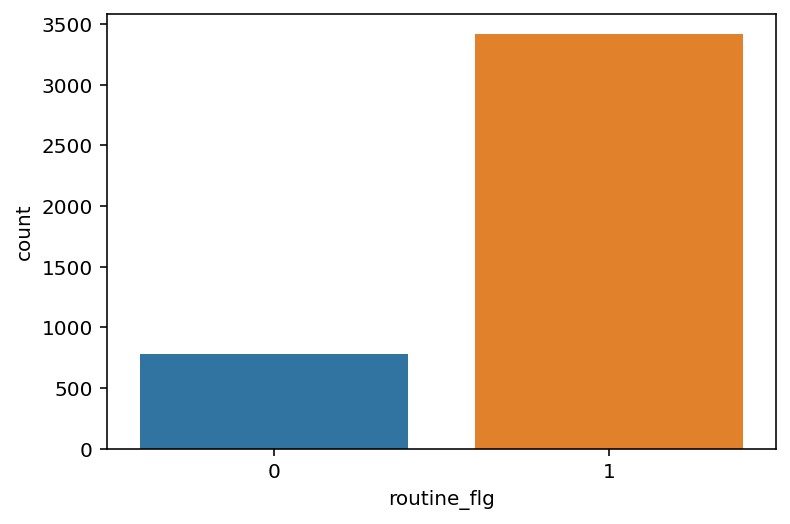

In [81]:
sns.countplot(customer_join["routine_flg"])

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

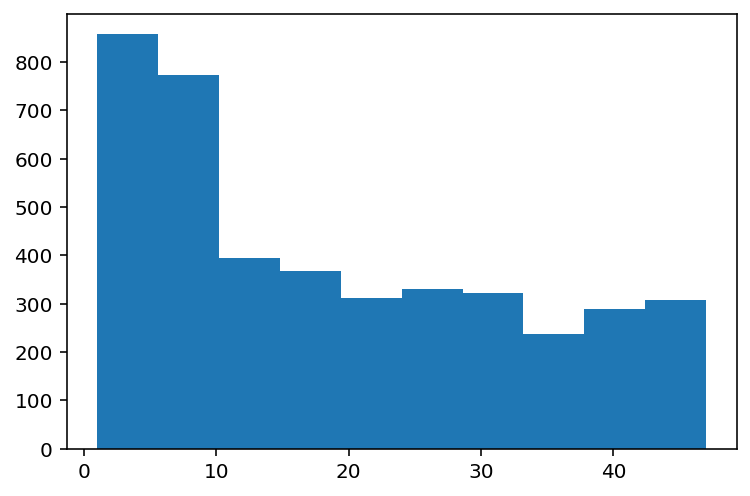

In [82]:
plt.hist(customer_join["membership_period"]) # 0부터 10개월까지가 많고, 10개월 유지한 분들은 유지됨.. 운동이 적성에 맞는거임.

(array([ 145.,  239.,  728., 1365.,  686.,  472.,  394.,  127.,   15.,
          21.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

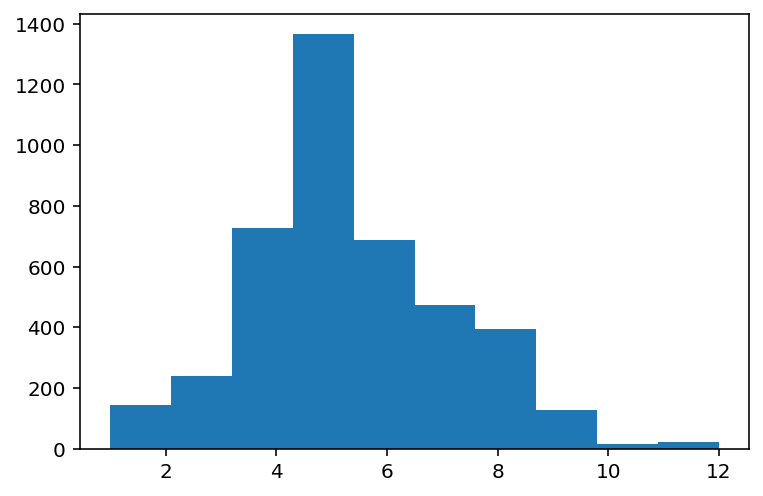

In [83]:
plt.hist(customer_join["mean"]) # 정규분포에 가깝게 되어 있음

In [84]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0] # 많이 이용하는 고객
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [85]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


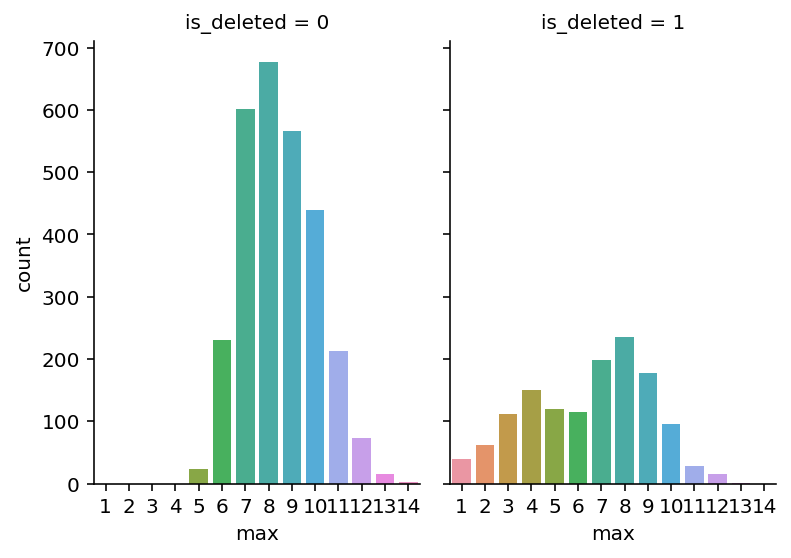

In [86]:
df=customer_join.groupby(['max','is_deleted'])['customer_id'].count().to_frame().rename(columns={'customer_id':'count'}).reset_index()
g = sns.catplot(x="max", y="count",col="is_deleted",
                data=df, kind="bar",
                height=4, aspect=.7);

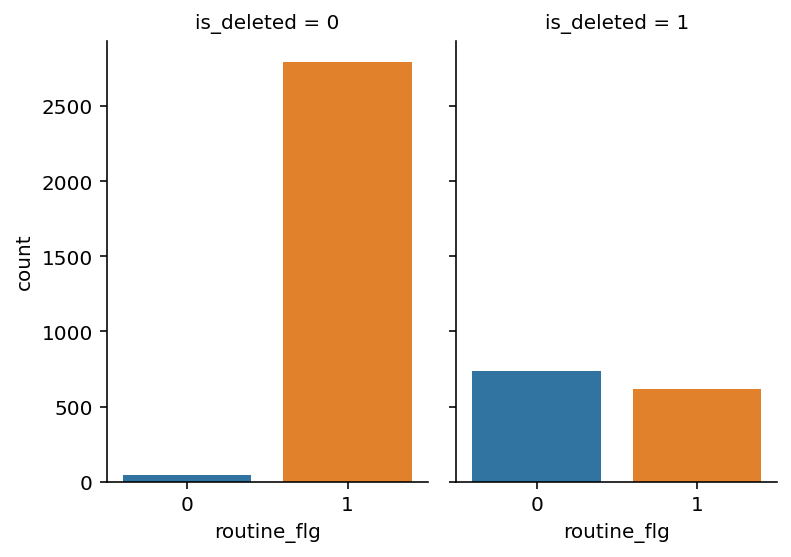

In [87]:
df=customer_join.groupby(['routine_flg','is_deleted'])['customer_id'].count().to_frame().rename(columns={'customer_id':'count'}).reset_index()
g = sns.catplot(x="routine_flg", y="count",col="is_deleted",
                data=df, kind="bar",
                height=4, aspect=.7);

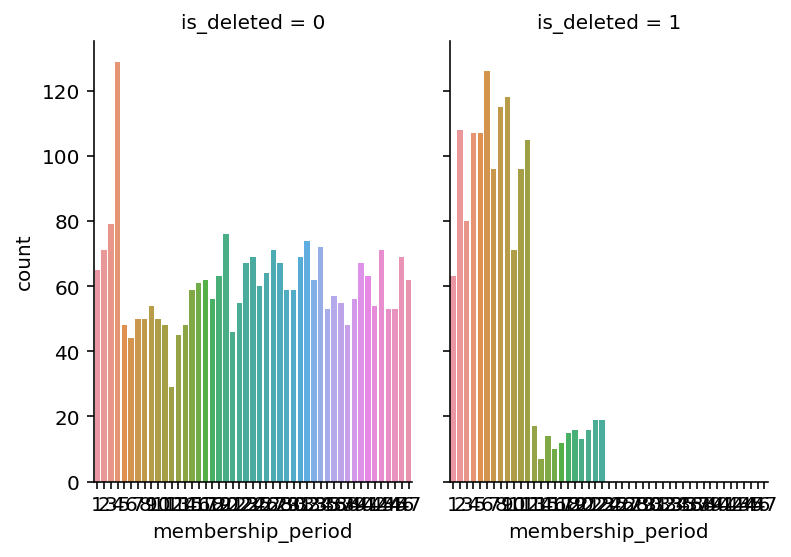

In [88]:
df=customer_join.groupby(['membership_period','is_deleted'])['customer_id'].count().to_frame().rename(columns={'customer_id':'count'}).reset_index()
g = sns.catplot(x="membership_period", y="count",col="is_deleted",
                data=df, kind="bar",
                height=4, aspect=.7); # is_deleted = 1인 사람은 10개월 넘어가는 경우 거의 x / 집계잘함!

In [ ]:
customer_join.to_csv("customer_join.csv", index=False)